http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.view_as_blocks

In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


## Generating patches

using already processed data to generate patches of (32x32x32). For each patien,we are genereting 1638 patches. we have 1595 patients, so it is **2612610 patches** in total!!

<font color="red"> Later on we should use cropped image, and play with step parameter.  </font>

In [186]:
PATH = '../../data/stage1_processed_errors/'
PATH_PATCHES = '../../data/stage1_3d_patches/'

patients = os.listdir(PATH)
patients.sort()

In [206]:
for patient in patients[:2]:
    A = np.load(PATH + patient)
    B = view_as_windows(A, window_shape=[32,32,32],step=8)
    [np.save(PATH_PATCHES+ patient[:-4] + '-{}{}{}.npy'.format(i,j,k), B[i,j,k,:,:]) \
     for i in range(B.shape[0]) for j in range(B.shape[1]) for k in range(B.shape[2])]
    
    print (patient)
    print ("\t", A.shape)
    print ("\t", B.shape)

0015ceb851d7251b8f399e39779d1e7d.npy
	 (134, 101, 137)
	 (13, 9, 14, 32, 32, 32)
0030a160d58723ff36d73f41b170ec21.npy
	 (134, 101, 137)
	 (13, 9, 14, 32, 32, 32)


In [210]:
len(patients)*B.shape[0]*B.shape[1]*B.shape[2]

2612610

## visualize the patches

In [66]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [211]:
first_patient = np.load(PATH + patients[0])
first_patient.shape

(134, 101, 137)

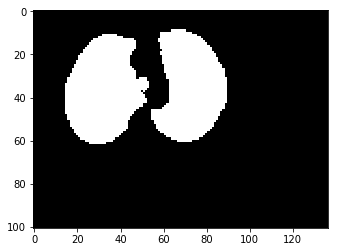

In [212]:
plt.imshow(first_patient[78], cmap=plt.cm.gray)
plt.show()

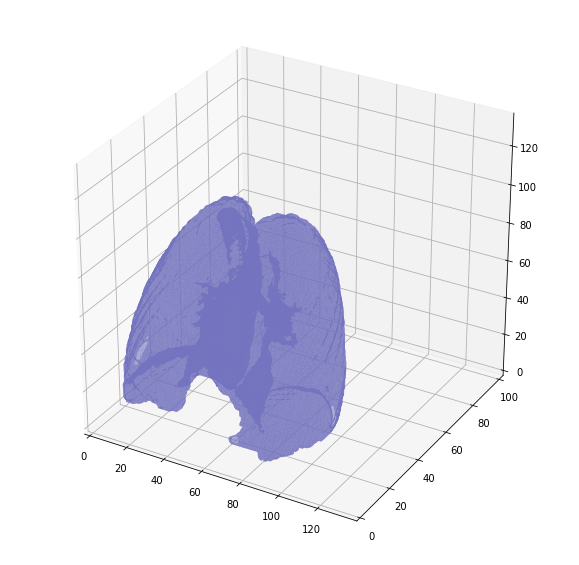

In [213]:
plot_3d(first_patient,0)

/opt/anaconda/lib/python3.5/site-packages/skimage/util/shape.py:247: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


(2, 2, 2, 32, 32, 32)


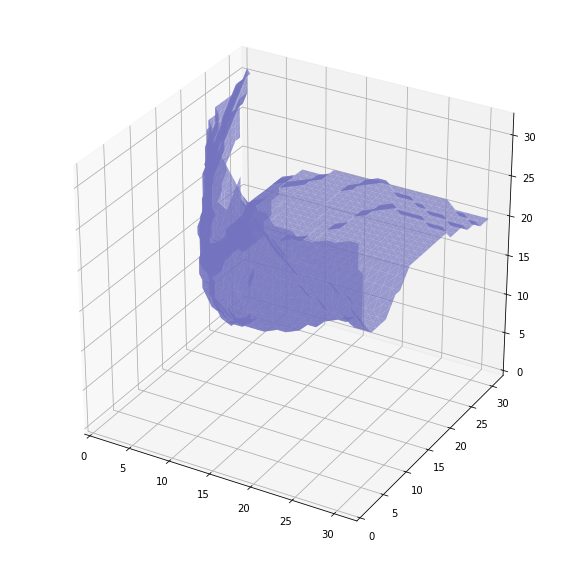

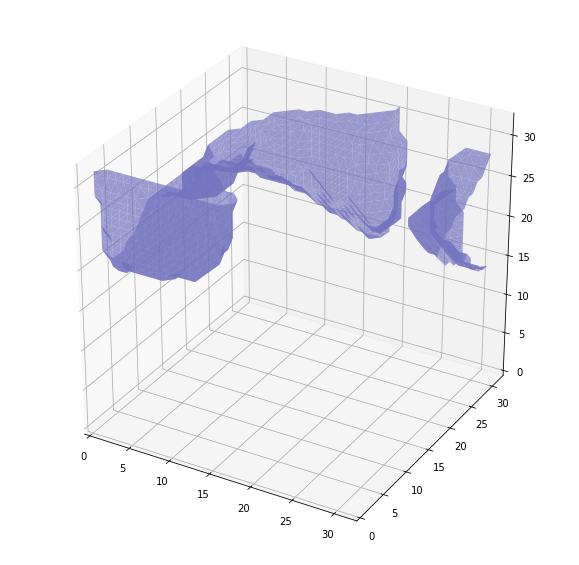

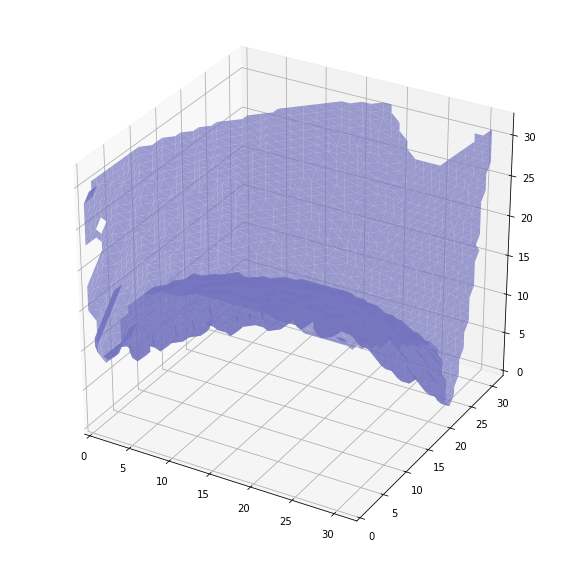

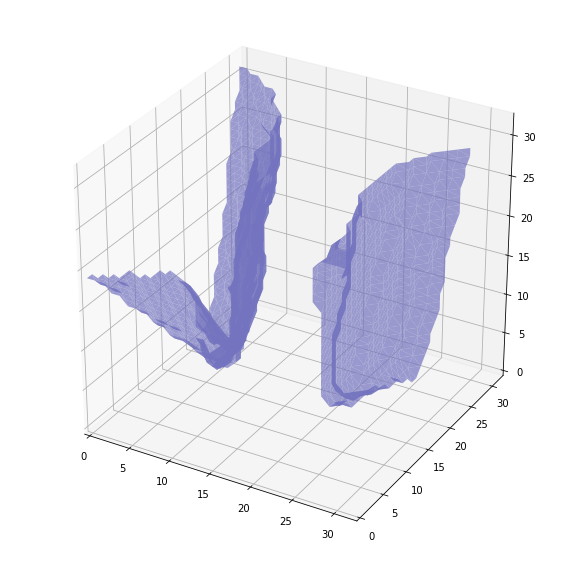

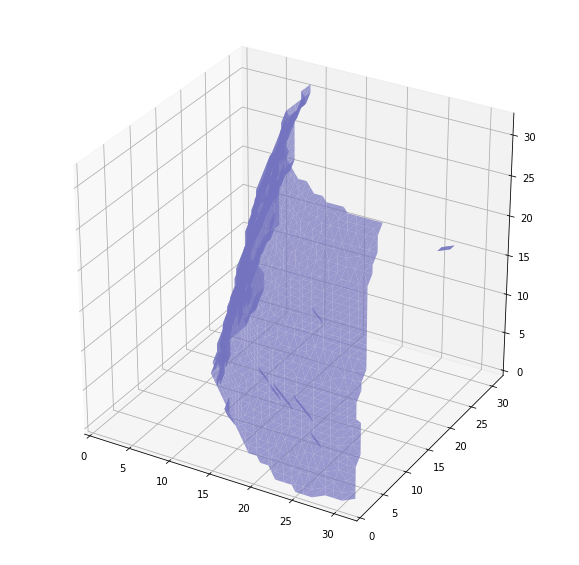

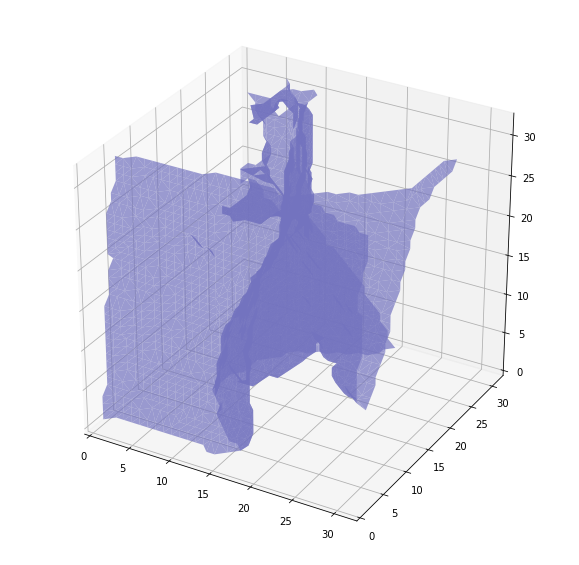

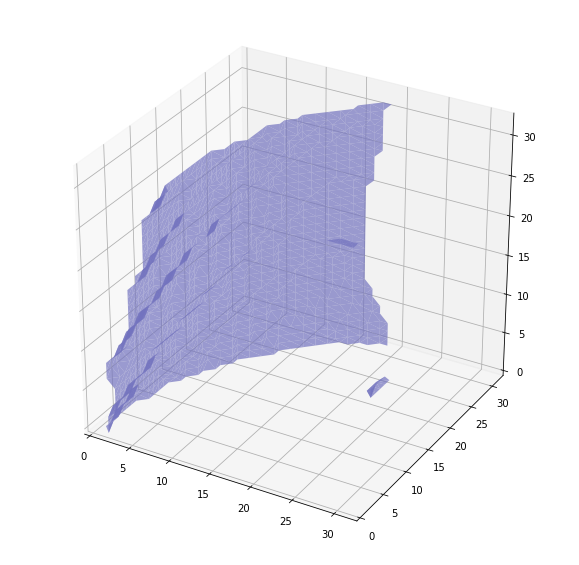

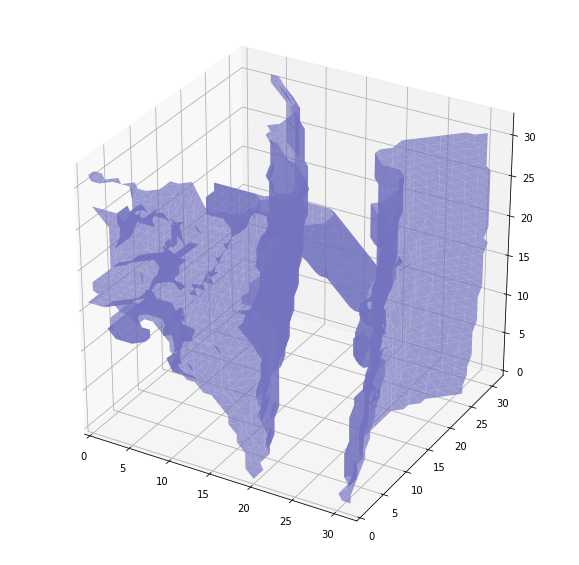

[None, None, None, None, None, None, None, None]

In [214]:
A = first_patient[:64,:64,:64]
B = view_as_windows(A, window_shape=[32,32,32],step=32)
print (A.shape)
print (B.shape)
[plot_3d(B[i,j,k,:,:],0) for i in range(B.shape[0]) \
                         for j in range(B.shape[1]) \
                         for k in range(B.shape[2])]